In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_UPDRS=[ 'NP1COG', 'NP1HALL', 'NP1DPRS',
       'NP1ANXS', 'NP1APAT', 'NP1DDS', 'NP2SPCH', 'NP2SALV', 'NP2SWAL',
       'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN',
       'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP3SPCH', 'NP3FACXP',
       'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL', 'NP3FTAPR',
       'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR',
       'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT',
       'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR',
       'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ',
       'NP3RTCON','NHY','MSEADLG', 'DYSKPRES', 'ON_OFF_DOSE', 'PD_MED_USE',
       'NP4WDYSK', 'NP4DYSKI', 'NP4OFF', 'NP4FLCTI', 'NP4FLCTX', 'NP4DYSTN']

In [3]:
file_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/dfFinal.csv'
file_path='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/pre-processing/dfFinal.csv'
df=pd.read_csv(file_path)
df.drop(columns='Unnamed: 0',inplace=True)
print(list(df.columns))
df.head(2)

['PATNO', 'EVENT_ID', 'INFODT', 'INFODT_date', 'NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'ON_OFF_DOSE', 'PD_MED_USE', 'NP4WDYSK', 'NP4DYSKI', 'NP4OFF', 'NP4FLCTI', 'NP4FLCTX', 'NP4DYSTN', 'NHY', 'MSEADLG', 'PDMEDYN', 'ONLDOPA', 'ONDOPAG', 'ONOTHER', 'FULNUPDR', 'PDSURG', 'PDSURGTP', 'MSRARSP', 'MSLARSP', 'MSRLRSP', 'MSLLRSP', 'COFNRRSP', 'COFNLRSP', 'COHSRRSP', 'COHSLRSP', 'SENRARSP', 'SENLARSP', 'SENRLRSP', 'SENLLRSP', 'RFLRAR

,PATNO,EVENT_ID,INFODT,INFODT_date,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,...,DXPOSINS,DXOTHSX,DOMSIDE,num_visits,VISIT_ID,visitsdiff_days,lastDate_diff_days,PDDXDT_diff_days,PDMEDT_diff_days,PDSURGDT_diff_days
0,3001,SC,02/2011,2011-02-01,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,2,7,1,0,2707,306,0,0
1,3001,V04,03/2012,2012-03-01,1.0,0.0,1.0,1.0,1.0,0.0,...,0,0,2,7,2,394,2313,700,0,0


In [4]:
def heatmap_features(df,sel_feat,fig_name,vmax=0.5):
    '''correlation between features'''
    sns.set(style="white")
    
    print('there are {} features'.format(len(sel_feat)))
    d = df[sel_feat]

    # Compute the correlation matrix
    corr = d.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(90, 90))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    ax=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .5})
    ax.figure.suptitle('correlation between features')
        
    # saving figure
    plt_path_name='/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/EDA/features_heatmap'
    plt_path_name=plt_path_name+fig_name
    ax.figure.savefig(fname=plt_path_name)

there are 63 features


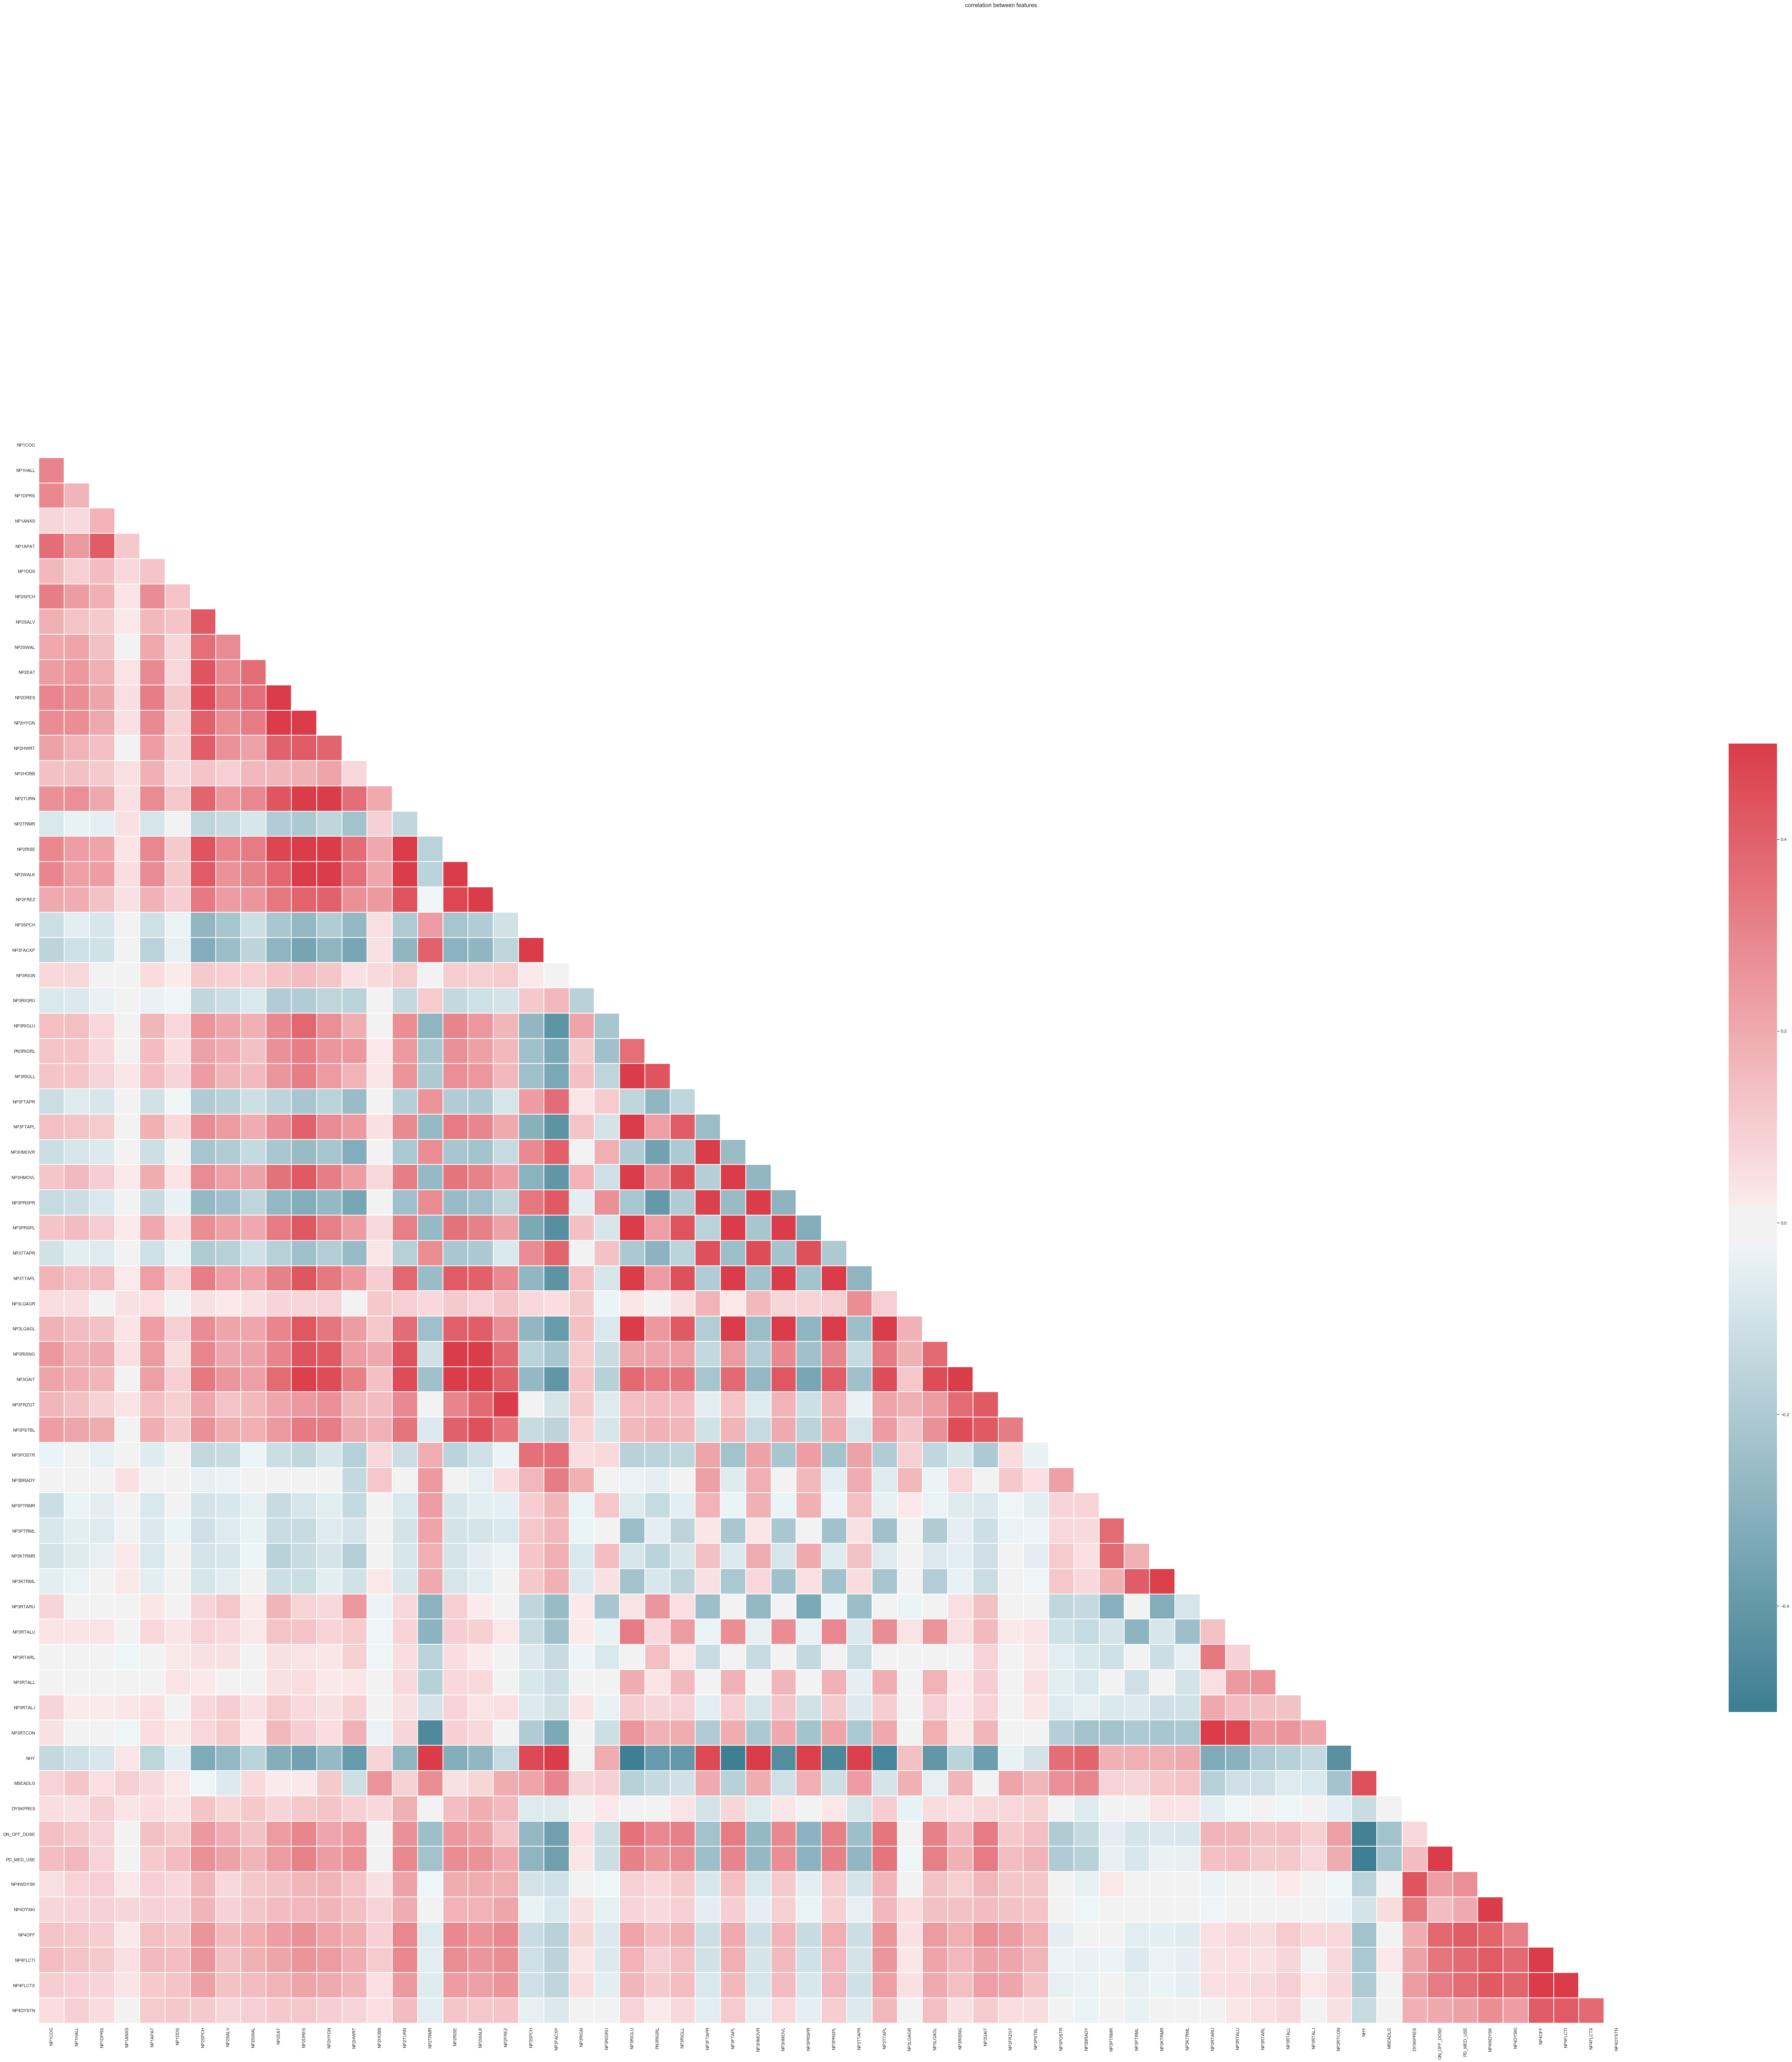

In [5]:
heatmap_features(df,col_UPDRS,'_UPDRS_bis.png')

there are 63 features


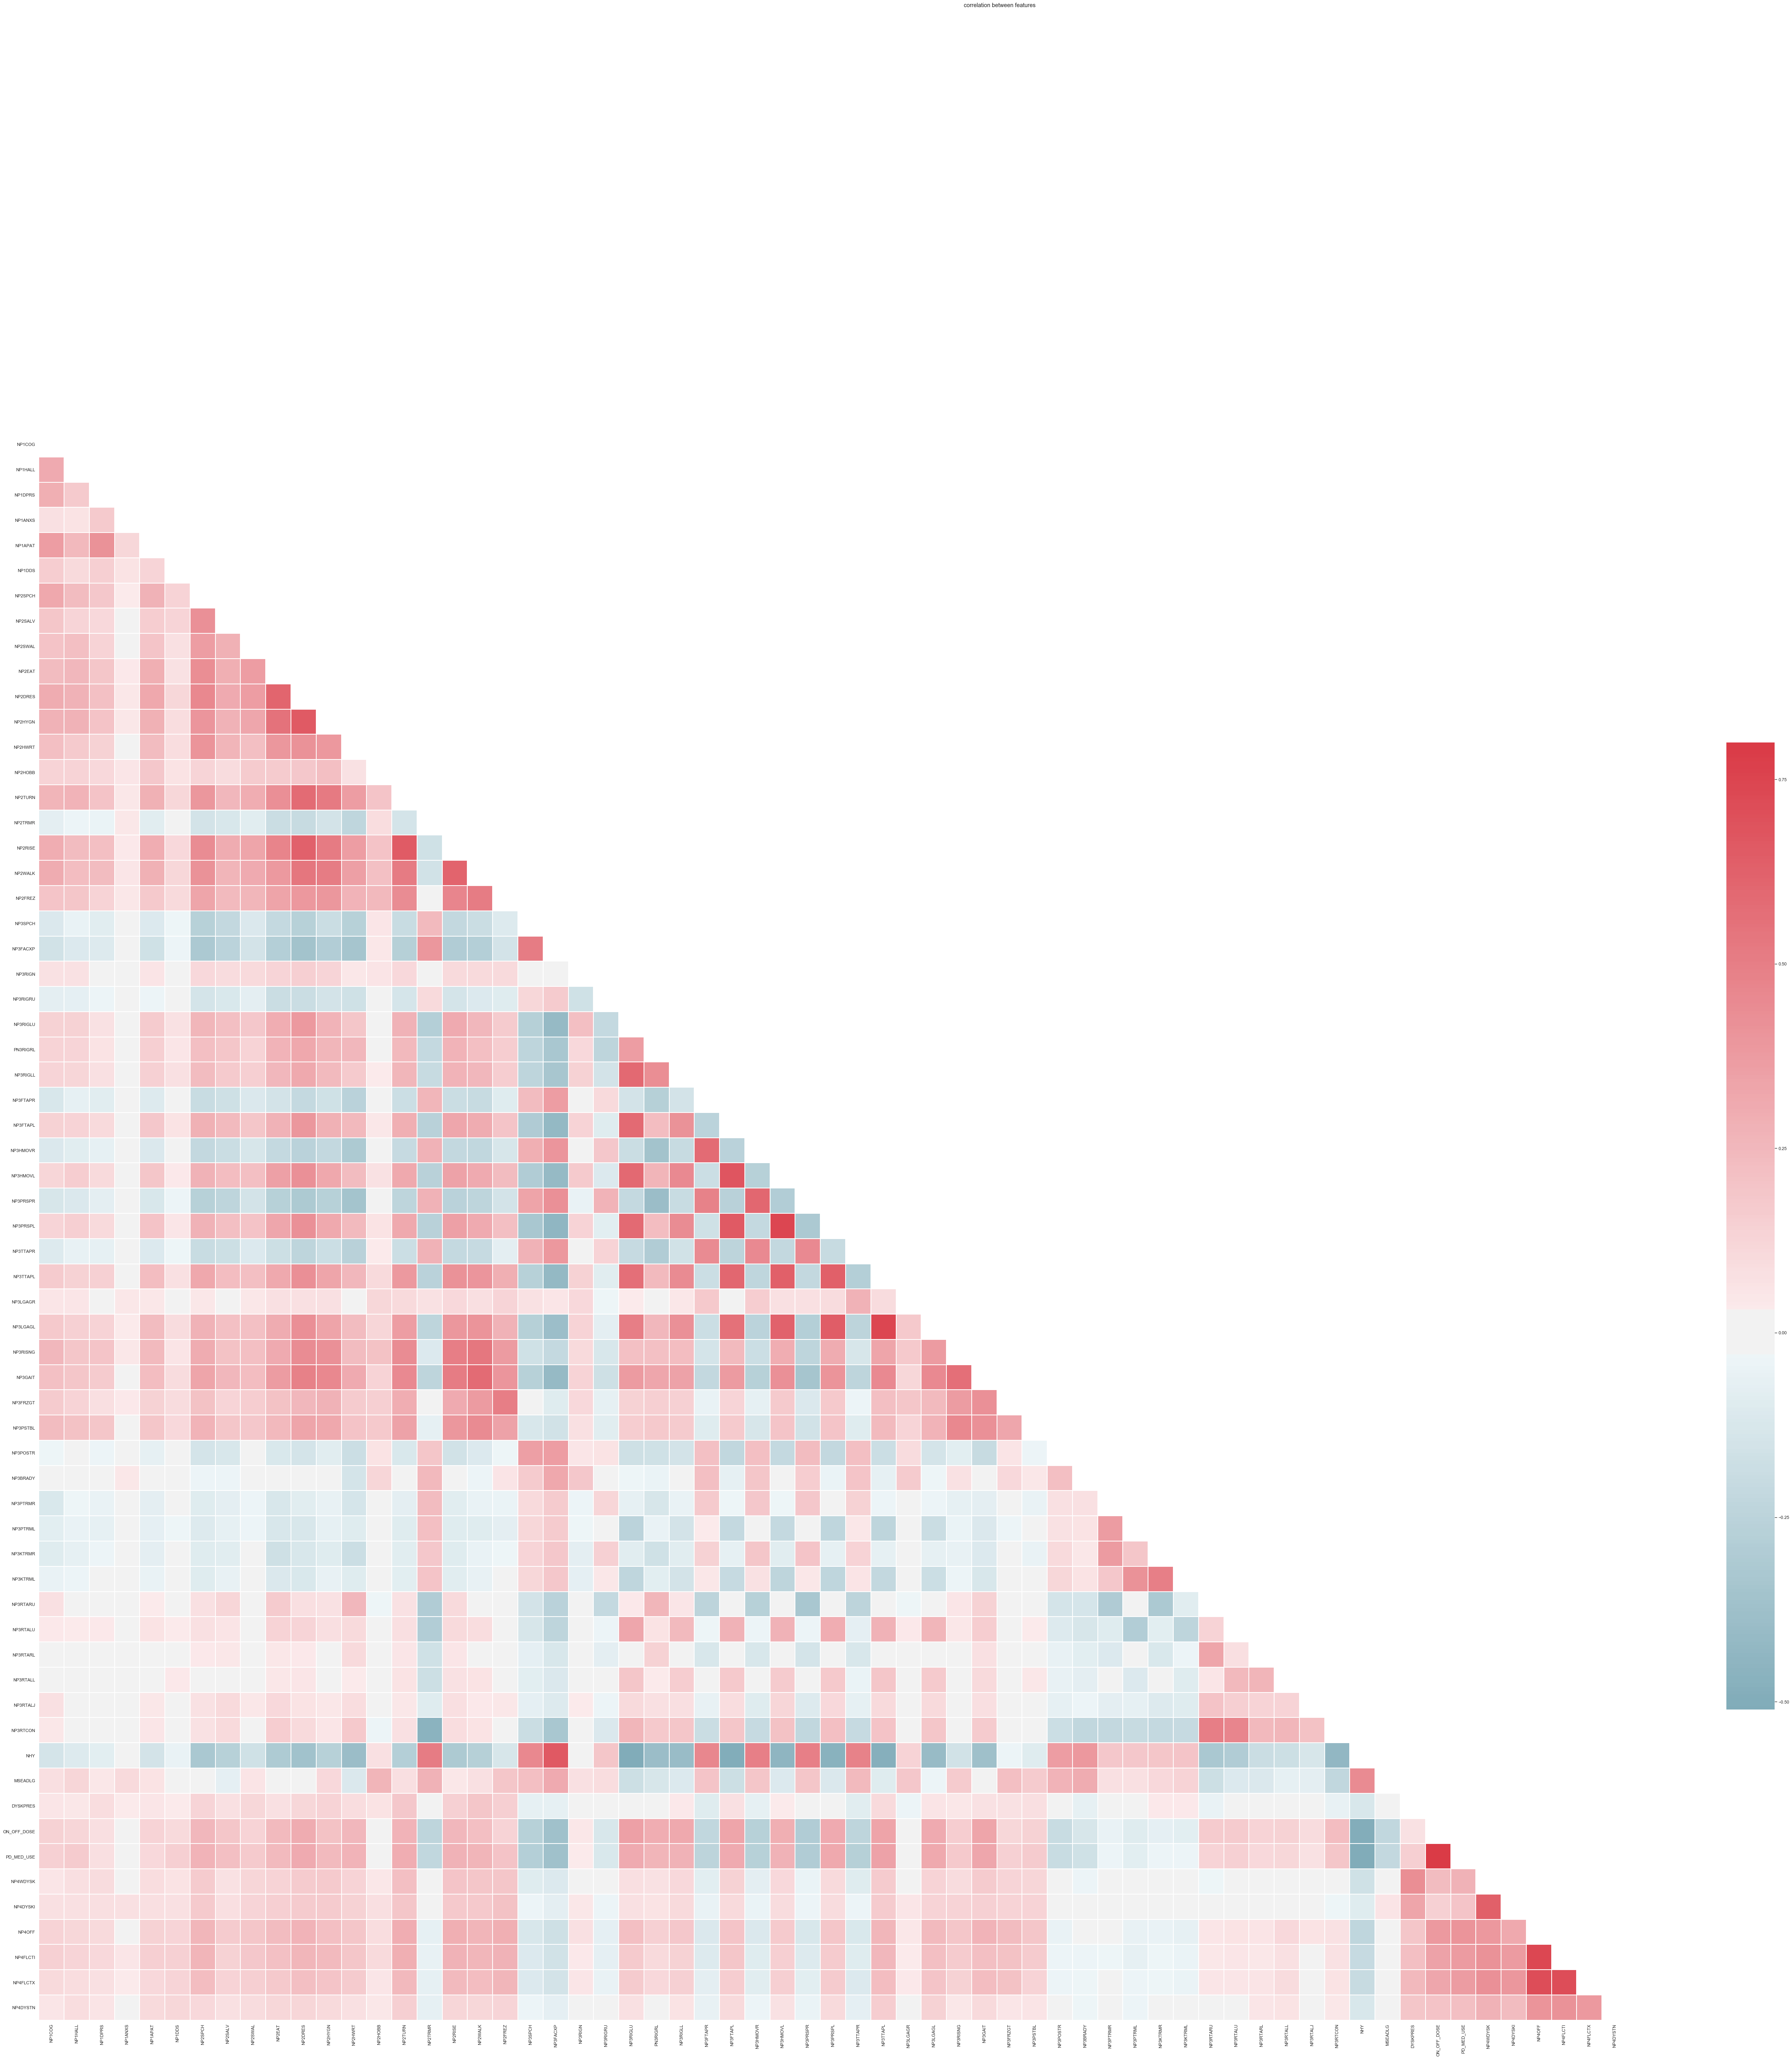

In [6]:
heatmap_features(df,col_UPDRS,'_UPDRS-0.8_bis.png',vmax=0.8)

In [7]:
medications_data_col=['PATNO', 'EVENT_ID', 'INFODT','num_visits','PDMEDYN', 'ONLDOPA', 'ONDOPAG',
       'ONOTHER', 'FULNUPDR', 'PDSURG','PDSURGTP','ON_OFF_DOSE','PD_MED_USE','PDMEDT_diff_days', 'PDSURGDT_diff_days']

df_medications=df[medications_data_col]
df_medications[df_medications['PDSURG']==1.0].head()

,PATNO,EVENT_ID,INFODT,num_visits,PDMEDYN,ONLDOPA,ONDOPAG,ONOTHER,FULNUPDR,PDSURG,PDSURGTP,ON_OFF_DOSE,PD_MED_USE,PDMEDT_diff_days,PDSURGDT_diff_days
125,3061,V12,04/2016,8,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,4.0,31,-244
405,3174,V10,04/2016,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,0,91
406,3174,V12,04/2017,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,0,456
438,3180,V12,07/2017,6,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0,0,303
498,3207,V12,03/2016,8,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0,29


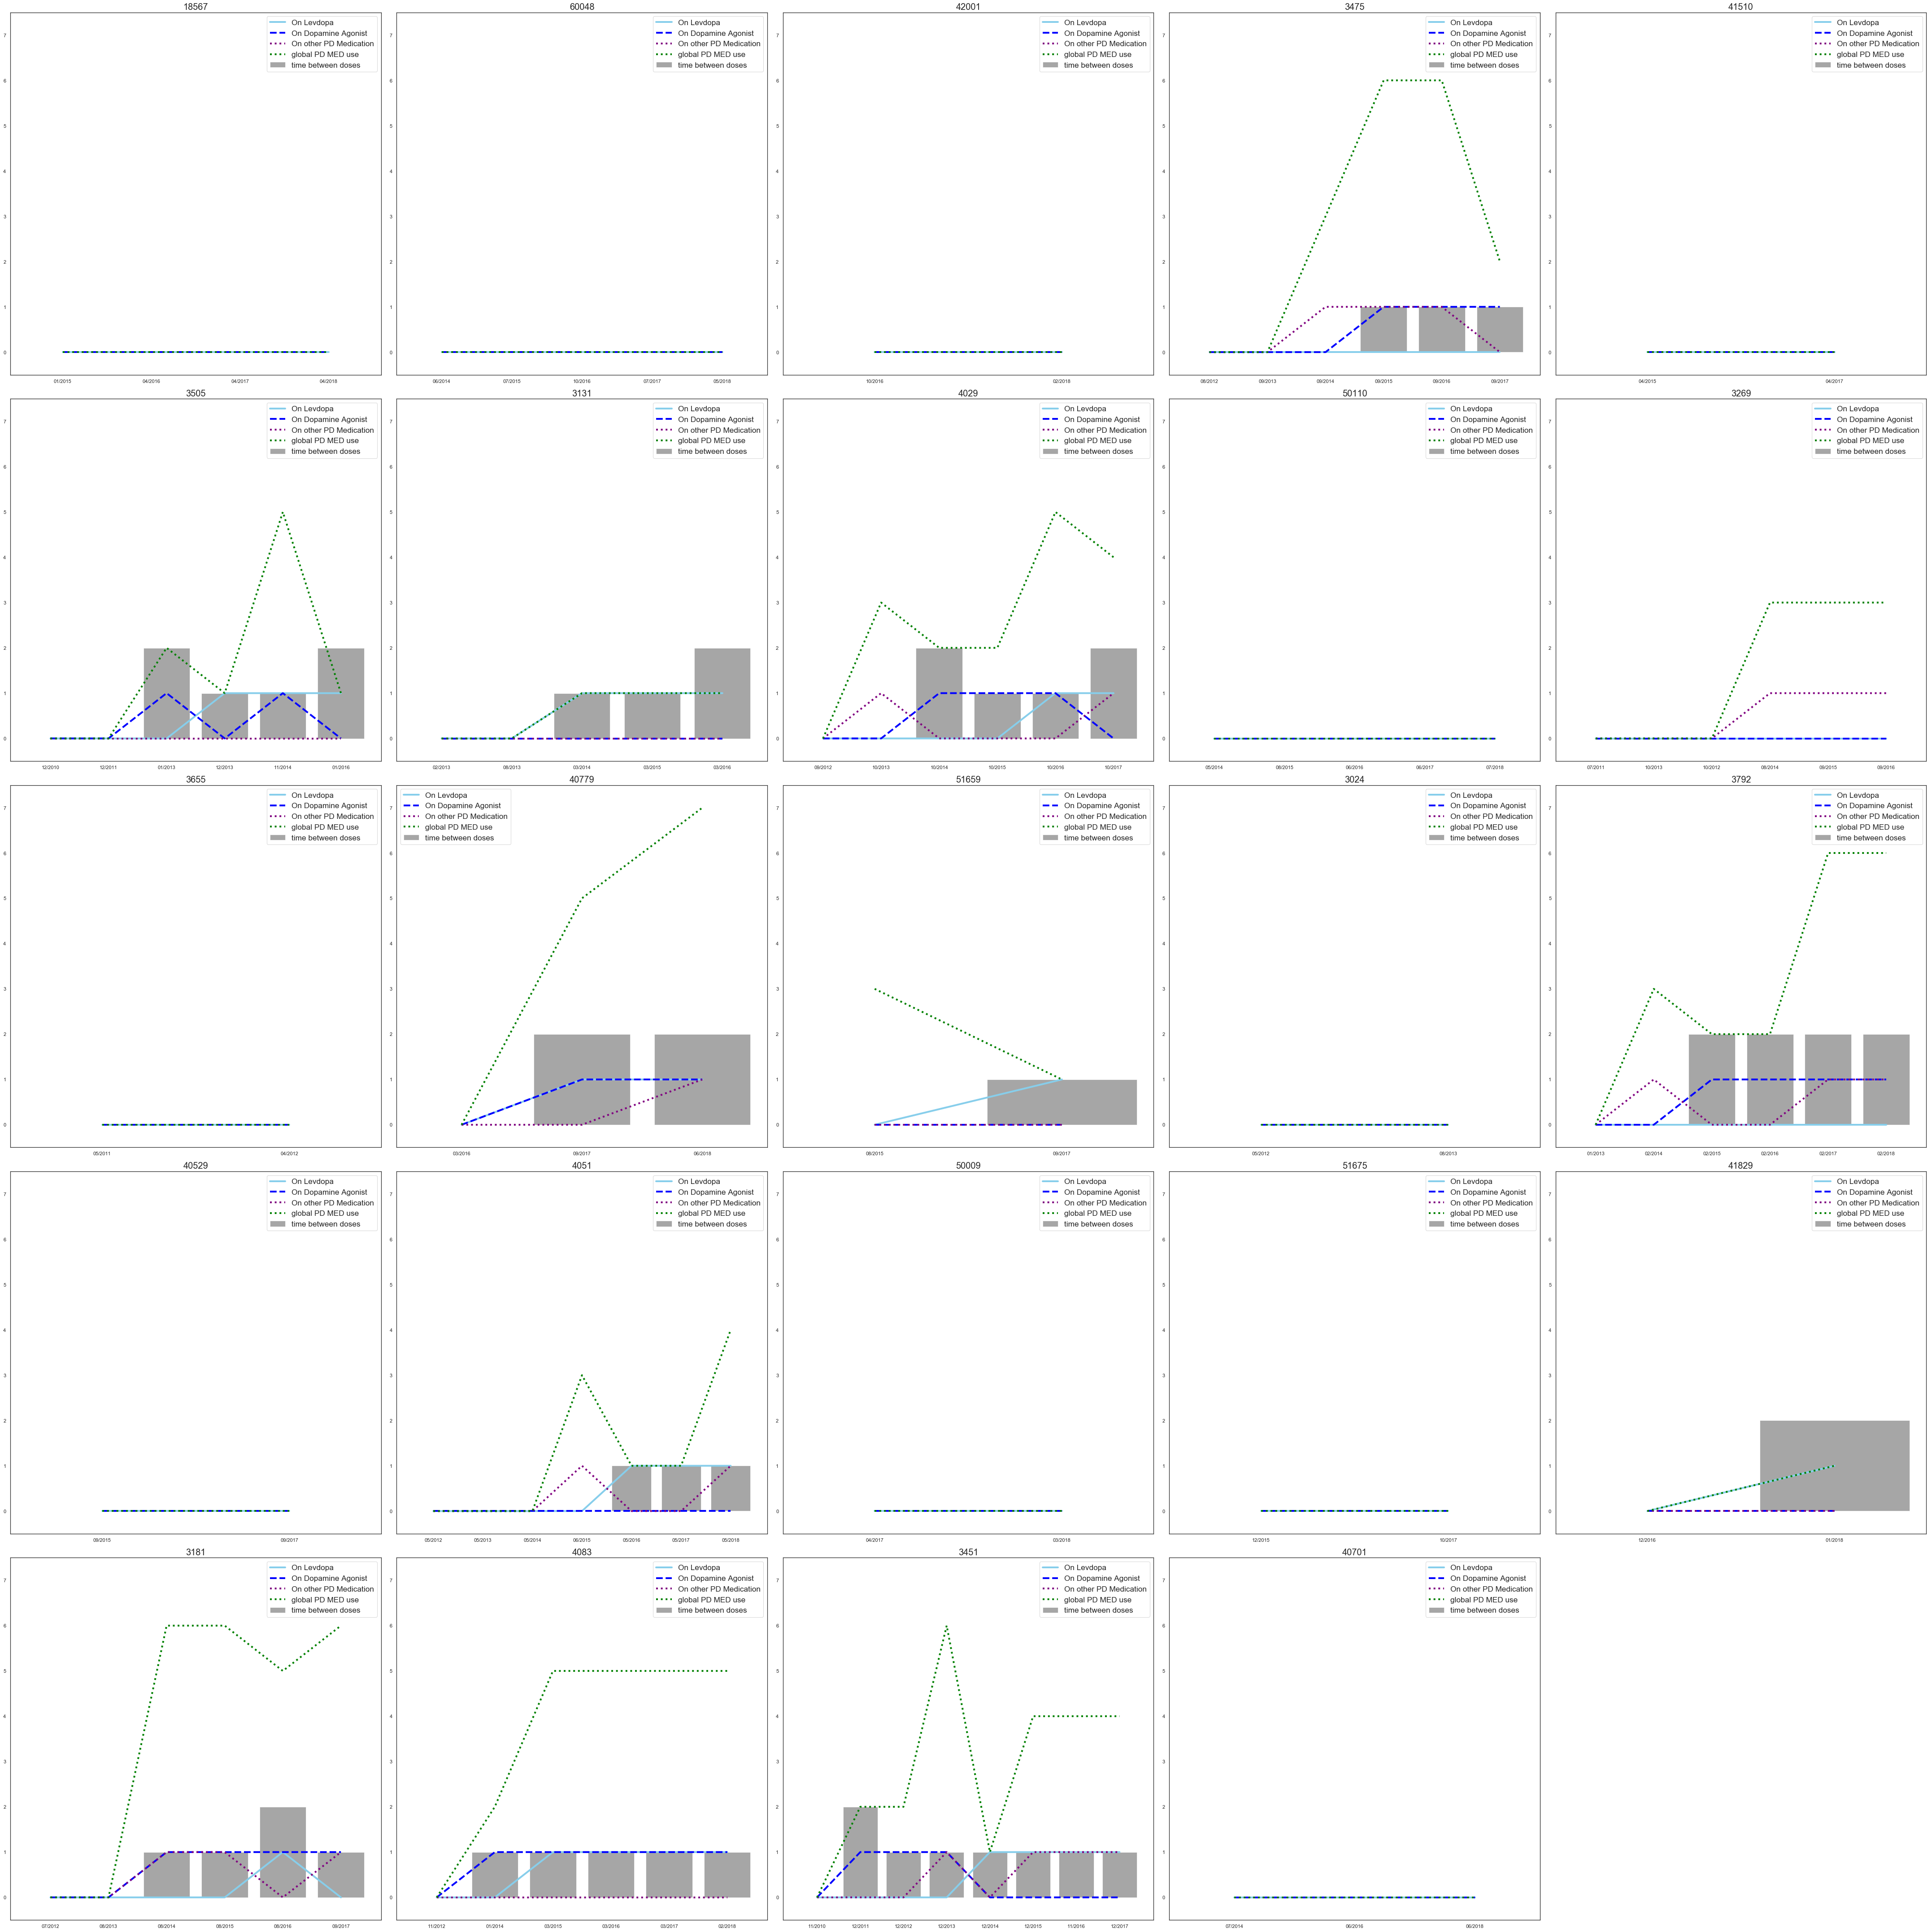

In [8]:
def patients_sampling_MoreThanOneVisit(df,sample_size=25,seed=123):
    np.random.seed(seed)
    df=df[df['num_visits']> 1]
    list_pat=list(set(df['PATNO']))
    patients_sample=list(np.random.choice(list_pat,25,replace=False))
    sub_df=df.loc[df['PATNO'].isin(patients_sample),:]
    return sub_df
df_toPlot=patients_sampling_MoreThanOneVisit(df_medications)

fig = plt.figure(figsize=(60,60))
num_pat=len(set(df_toPlot['PATNO']))
for pat,num in zip(list(set(df_toPlot['PATNO'])),range(1,num_pat)):
    df0=df_toPlot[df_toPlot['PATNO']==pat]
    ax = fig.add_subplot(5,5,num)
    ax.plot(df0['INFODT'], df0['ONLDOPA'],marker='', markerfacecolor='blue', markersize=15, 
            color='skyblue', linewidth=4,label='On Levdopa')
    ax.plot(df0['INFODT'], df0['ONDOPAG'],marker='',markersize=15,
            color='blue',linestyle='dashed',linewidth=4,label='On Dopamine Agonist')
    ax.plot(df0['INFODT'], df0['ONOTHER'], marker='', 
            color='purple', linewidth=4, linestyle='dotted', label='On other PD Medication')
    ax.bar(df0['INFODT'], df0['ON_OFF_DOSE'],
            color='grey',label='time between doses',alpha=0.7)
    ax.plot(df0['INFODT'], df0['PD_MED_USE'], marker='', 
            color='green', linewidth=4, linestyle='dotted', label='global PD MED use')
    ax.set_ylim([-0.5, 7.5])
    ax.set_title(pat,fontdict={'fontsize':20})
    ax.legend(fontsize='x-large')
plt.tight_layout()
#fig.figure.suptitle('true labels vs predictions')
plt.savefig('/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/EDA/PD-Medication/graph_seed123.png')
plt.show()       

In [26]:
# to plot
# NHY, MSEADLG, (sum_UPDRS1, sum_UPDRS2, sum_UPDRS3, sum_UPDRS4) PD_MED_USE 
ColSel=['PATNO', 'EVENT_ID', 'INFODT','num_visits','ON_OFF_DOSE','PD_MED_USE','PDMEDT_diff_days','NHY','MSEADLG']
df_progression_MEDUSE=df[ColSel]
#df_progression_MEDUSE['MSEADLG_modPlot']=100/df_progression_MEDUSE['MSEADLG']
df_progression_MEDUSE['MSEADLG_modPlot']=-np.log10(1/df_progression_MEDUSE['MSEADLG'])
df_progression_MEDUSE['MSEADLG_modPlot']=df_progression_MEDUSE['MSEADLG_modPlot'].apply(lambda x: round(x,1))
df_progression_MEDUSE['MSEADLG_modPlot'].describe()

/Users/alicemartin/miniconda3/envs/project/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alicemartin/miniconda3/envs/project/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


count    4784.000000
mean        1.967705
std         0.075578
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: MSEADLG_modPlot, dtype: float64

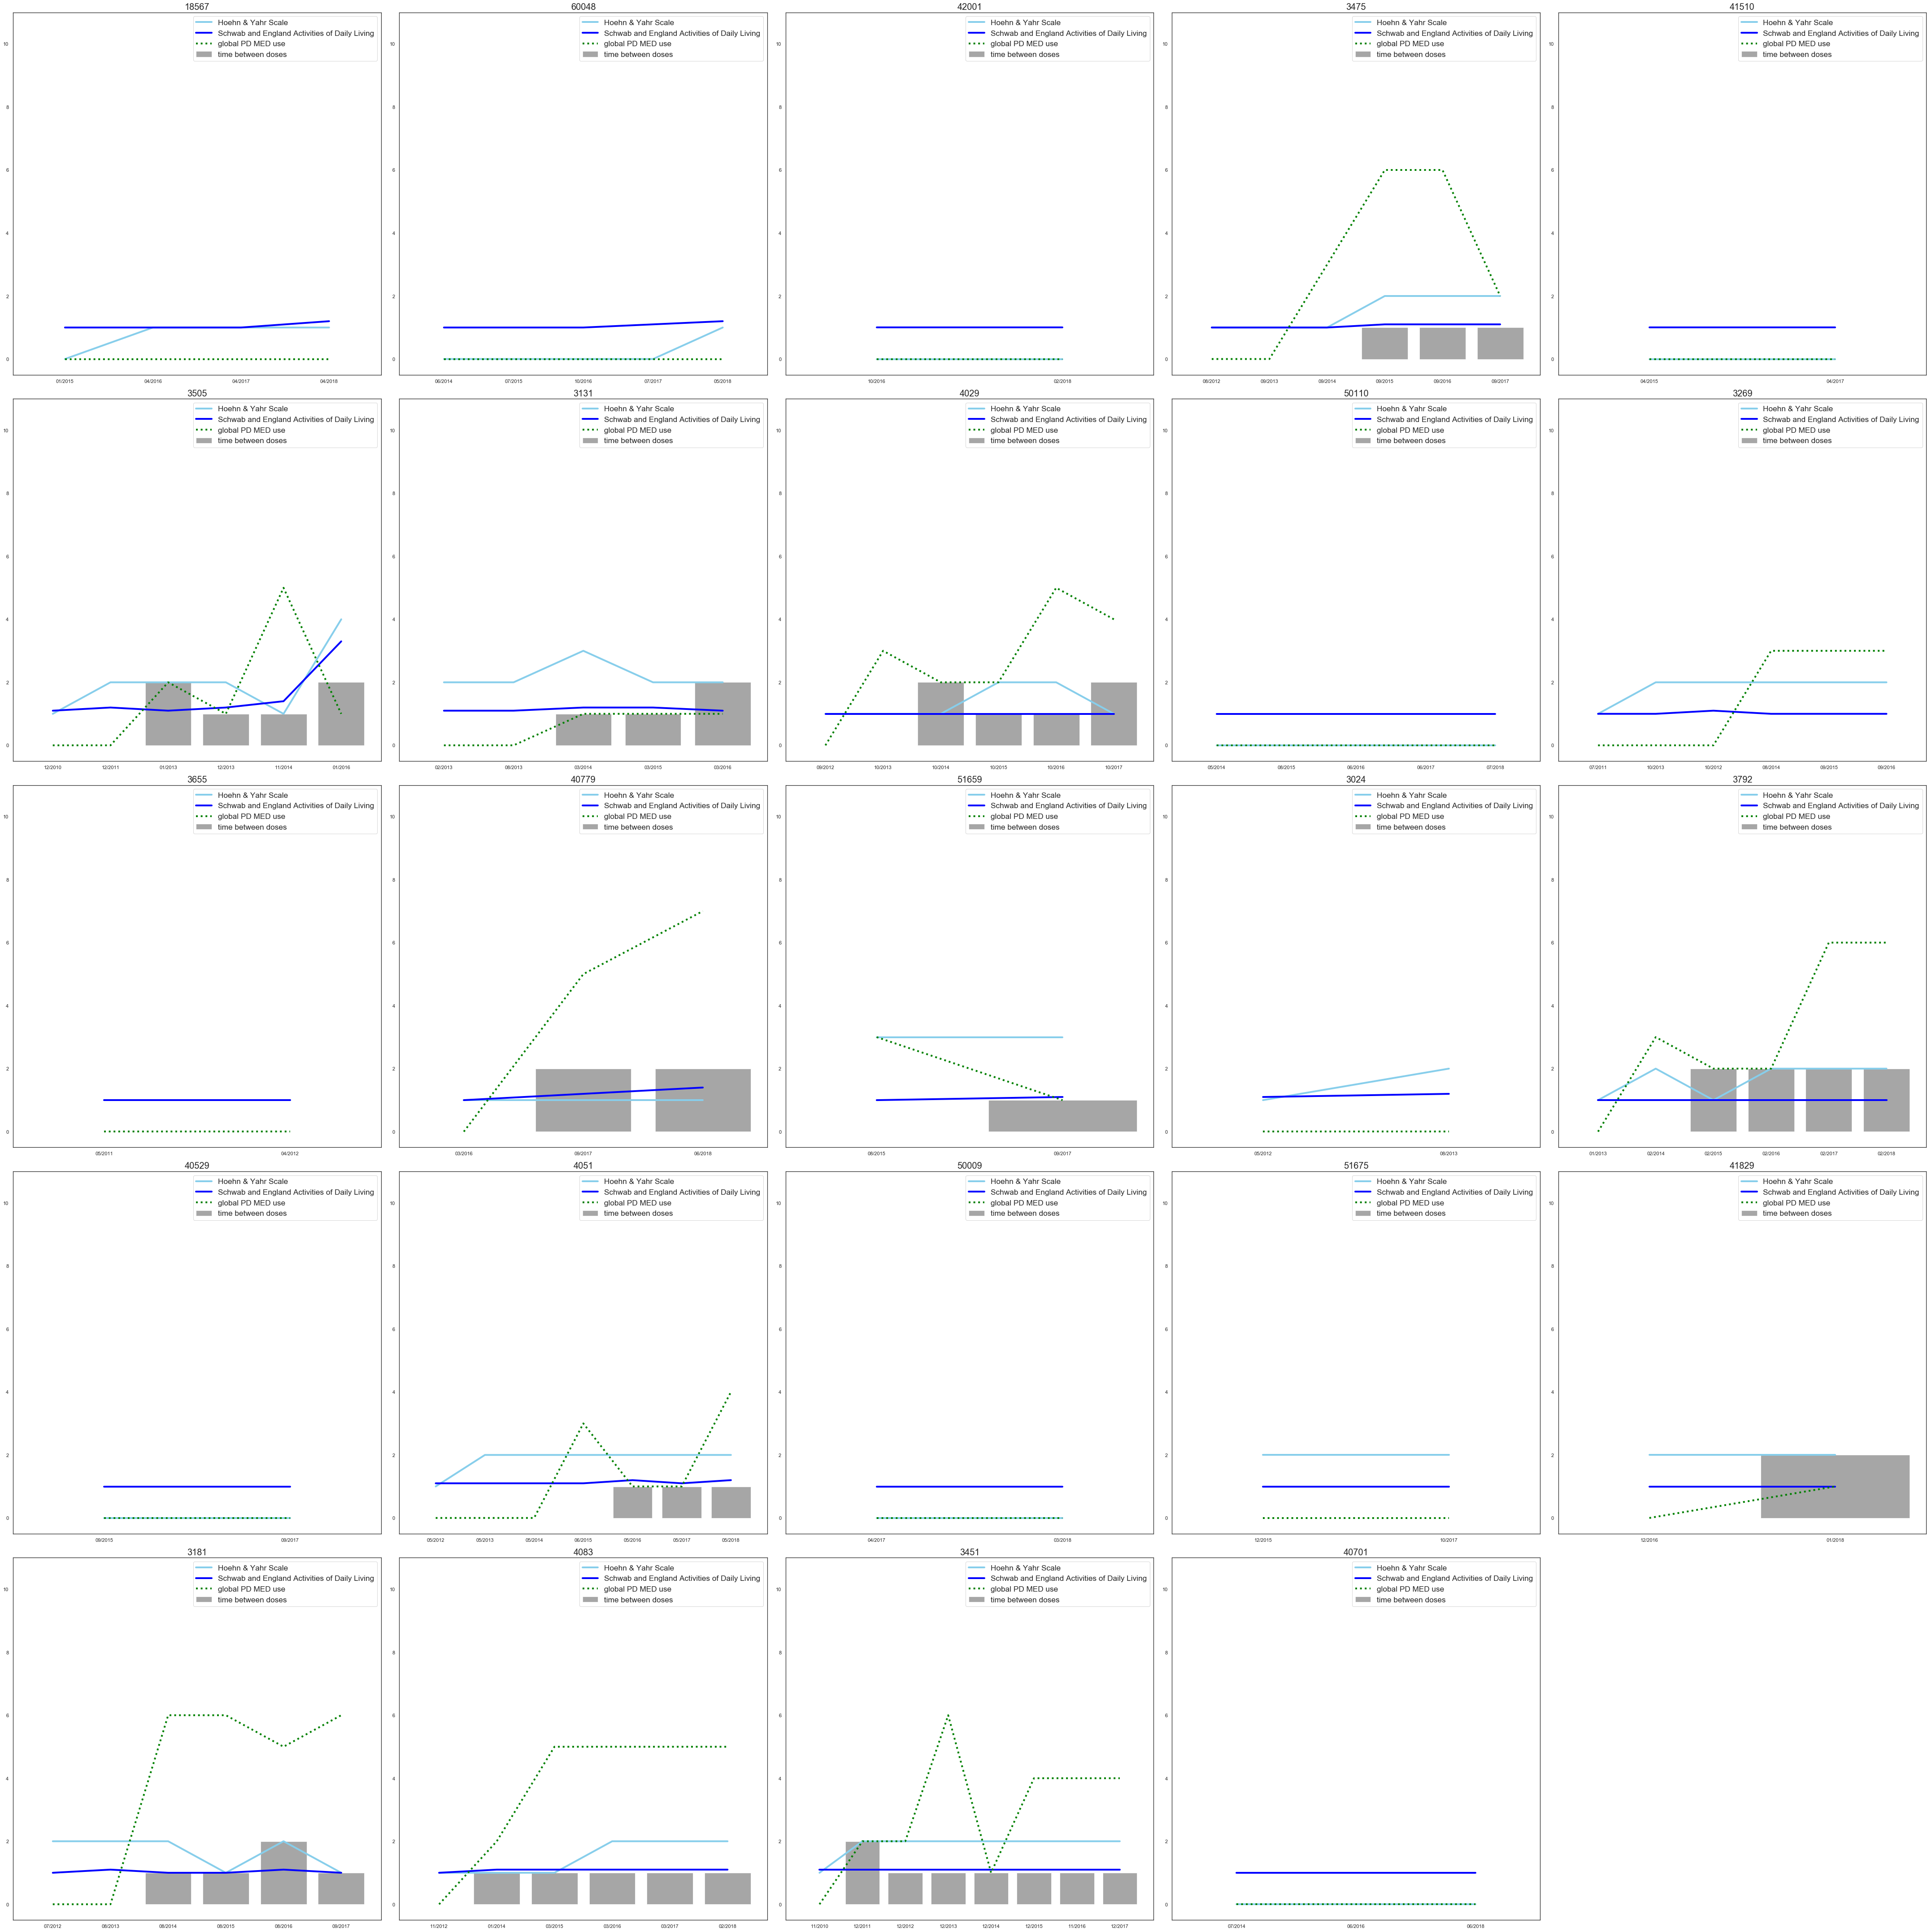

In [23]:
def patients_sampling_MoreThanOneVisit(df,sample_size=25,seed=123):
    np.random.seed(seed)
    df=df[df['num_visits']> 1]
    list_pat=list(set(df['PATNO']))
    patients_sample=list(np.random.choice(list_pat,25,replace=False))
    sub_df=df.loc[df['PATNO'].isin(patients_sample),:]
    return sub_df
df_toPlot=patients_sampling_MoreThanOneVisit(df_progression_MEDUSE)

fig = plt.figure(figsize=(60,60))
num_pat=len(set(df_toPlot['PATNO']))
for pat,num in zip(list(set(df_toPlot['PATNO'])),range(1,num_pat)):
    df0=df_toPlot[df_toPlot['PATNO']==pat]
    ax = fig.add_subplot(5,5,num)
    ax.plot(df0['INFODT'], df0['NHY'],marker='', markerfacecolor='blue', markersize=15, 
            color='skyblue', linewidth=4,label='Hoehn & Yahr Scale')
    ax.plot(df0['INFODT'], df0['MSEADLG_modPlot'],marker='',markersize=15,
            color='blue',linewidth=4,label='Schwab and England Activities of Daily Living')
    ax.bar(df0['INFODT'], df0['ON_OFF_DOSE'],
            color='grey',label='time between doses',alpha=0.7)
    ax.plot(df0['INFODT'], df0['PD_MED_USE'], marker='', 
            color='green', linewidth=4, linestyle='dotted', label='global PD MED use')
    ax.set_ylim([-0.5, 11])
    ax.set_title(pat,fontdict={'fontsize':20})
    ax.legend(fontsize='x-large')
plt.tight_layout()
#fig.figure.suptitle('true labels vs predictions')
plt.savefig('/Users/alicemartin/02_DSR_Project/parkinson-disease-project/output/EDA/PD-Medication/NHY&MSEADLG-vs-MED_123.png')
plt.show()